In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks
%matplotlib inline
warnings.filterwarnings('ignore')

In [272]:
#pip install xgboost

In [273]:
#from numpy import loadtxt
#from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

In [274]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [275]:
LeadScore_df = pd.read_csv("Lead-analysis\Lead Batch Enrich 6-2.csv", encoding='latin-1', parse_dates=['Domain expiry date','Domain creation date'])
LeadScore_df

,City,Company,Email,FirstName,Is_Submitted,LastName,LS Amount to Borrow,LS GAS,LS Self Graded Credit,Phone,...,Mean employee age,DUNS,NAICS,NAICS sector code,Number of employees range,Company credit score,Number of socials,Region count,Confidence Score,LS State
0,McKinney,Namaste Cafe,00mojosdad@gmail.com,Lee,0,Rone,150000,240000,3,4693217785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40
1,Gilbert,Beauty To You,0326studio@gmail.com,Pedro,0,Falcon,15000,150000,2,4803833027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,NaN,Covert Ops Security M&B,06waking_label@icloud.com,Marcus,0,Hardy,37500,60000,1000,410 4439828,...,NaN,653656262.0,523120.0,52.0,51-200,NaN,NaN,NaN,99.0,47
3,NaN,On the go towing,09grandpa@gmail.com,Luallen,0,Weaver,37500,60000,1010,229 3495406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47
4,NaN,Perfectly square remodeling,09jespinoza2@gmail.com,Jonathan,0,Espinoza,7500,150000,1000,678 9149946,...,NaN,130691534.0,541511.0,54.0,44571,48.0,NaN,NaN,100.0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,NaN,ZuMonroe's Custom Creations LLC,zumonroes@gmail.com,Shamica,0,Dickerson,7500,60000,1267,336 3358387,...,NaN,118014423.0,448120.0,44.0,44571,NaN,NaN,NaN,100.0,47
16602,NaN,Mazur LLC,zurawskim74@gmail.com,Mariusz,1,Zurawski,37500,750000,5051,480 4760784,...,NaN,117471218.0,561499.0,56.0,44571,NaN,NaN,NaN,100.0,47
16603,NaN,Zuritech Billing Solutions,zuritechsolutions@gmail.com,Michelle,0,Dodd,7500,60000,1267,405 9817133,...,NaN,15735646.0,999990.0,99.0,44571,NaN,NaN,NaN,100.0,47
16604,NaN,Zane Myers Agency LLC,zwmyers5@gmail.com,Zane,0,Myers,25000,300000,1280,660 7488765,...,NaN,31000176.0,999990.0,99.0,44571,NaN,NaN,NaN,100.0,47


In [276]:
LeadScore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16606 entries, 0 to 16605
Data columns (total 61 columns):
 #   Column                                               Non-Null Count  Dtype              
---  ------                                               --------------  -----              
 0   City                                                 9393 non-null   object             
 1   Company                                              16606 non-null  object             
 2   Email                                                16606 non-null  object             
 3   FirstName                                            16606 non-null  object             
 4   Is_Submitted                                         16606 non-null  int64              
 5   LastName                                             16606 non-null  object             
 6   LS Amount to Borrow                                  16606 non-null  int64              
 7   LS GAS                                  

In [277]:
LeadScore_df.isnull().sum()

City                     7213
Company                     0
Email                       0
FirstName                   0
Is_Submitted                0
                        ...  
Company credit score    12716
Number of socials       13011
Region count            13011
Confidence Score         5826
LS State                    0
Length: 61, dtype: int64

In [278]:
LeadScore_df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [279]:
LeadScore_df.columns

Index(['City', 'Company', 'Email', 'FirstName', 'Is_Submitted', 'LastName',
       'LS_Amount_to_Borrow', 'LS_GAS', 'LS_Self_Graded_Credit', 'Phone',
       'PostalCode', 'State', 'Street', 'SubmitterIP__c', 'Web_Ad_Outlet__c',
       'Web_Ad_Outlet_Source__c', 'Website', 'Full_Name',
       'Home_Street_Address', 'Longitude', 'Latitude',
       'Results_From_Wikipedia', 'Company_Website', 'Has_Customer_Service',
       'Results_From_Wikipedia_1', 'Map_Exists', 'Results_Snippets',
       'Unclaimed_Listing', 'Permanently_Closed', 'Rating',
       'Number_of_Reviews', 'Number_of_Results', 'Company_Website_1',
       'Company_type', 'Mean_monthly_mortgage_and_owner_costs', 'Rent_mean',
       'Average_number_of_reviews', 'Total_number_of_businesses',
       'Money_spend_on_website_technologies', 'Is_established',
       'Number_of_technologies', 'Company_vertical', 'Domain_expiry_date',
       'Domain_creation_date',
       '$100,000_to_$149,999_-_non-family_households_income',
       'L

In [280]:
LeadScore_df['Difference'] = (LeadScore_df['Domain_expiry_date']- LeadScore_df['Domain_creation_date']).dt.days

In [281]:
LeadScore_df.groupby('Is_Submitted').mean()['Mean_monthly_mortgage_and_owner_costs'].round(decimals=2)

Is_Submitted
0    1644.23
1    1648.07
Name: Mean_monthly_mortgage_and_owner_costs, dtype: float64

In [282]:
LeadScore_df.groupby('Is_Submitted').mean()['Total_number_of_businesses'].round(decimals=2)

Is_Submitted
0    15.26
1    15.72
Name: Total_number_of_businesses, dtype: float64

In [283]:
df_mask = ( LeadScore_df.LS_Self_Graded_Credit >=1000 ) &  ( LeadScore_df.LS_Self_Graded_Credit <= 5200 )  

Lead_filtered= LeadScore_df[df_mask]
Lead_filtered

,City,Company,Email,FirstName,Is_Submitted,LastName,LS_Amount_to_Borrow,LS_GAS,LS_Self_Graded_Credit,Phone,...,DUNS,NAICS,NAICS_sector_code,Number_of_employees_range,Company_credit_score,Number_of_socials,Region_count,Confidence_Score,LS_State,Difference
2,NaN,Covert Ops Security M&B,06waking_label@icloud.com,Marcus,0,Hardy,37500,60000,1000,410 4439828,...,653656262.0,523120.0,52.0,51-200,NaN,NaN,NaN,99.0,47,NaN
3,NaN,On the go towing,09grandpa@gmail.com,Luallen,0,Weaver,37500,60000,1010,229 3495406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,NaN
4,NaN,Perfectly square remodeling,09jespinoza2@gmail.com,Jonathan,0,Espinoza,7500,150000,1000,678 9149946,...,130691534.0,541511.0,54.0,44571,48.0,NaN,NaN,100.0,47,NaN
7,NORTH HOLLYWOOD,10 PLUS MANAGEMENT LLC,10plusmgmt@gmail.com,THARELL,0,GAMBOA,37500,60000,5051,213 8203208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
9,NaN,120 Industries,120ind@gmail.com,Gerald,0,Duff,37500,350000,1011,661 8776262,...,NaN,NaN,NaN,1001-5000,100.0,NaN,NaN,99.0,47,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,NaN,Zulay Green Stone LLC,zulayurb@live.com,Luis,0,GonzÃ¡lez,20000,540000,1280,305 9620250,...,86357192.0,541990.0,54.0,18568,NaN,NaN,NaN,99.0,47,NaN
16601,NaN,ZuMonroe's Custom Creations LLC,zumonroes@gmail.com,Shamica,0,Dickerson,7500,60000,1267,336 3358387,...,118014423.0,448120.0,44.0,44571,NaN,NaN,NaN,100.0,47,730.0
16602,NaN,Mazur LLC,zurawskim74@gmail.com,Mariusz,1,Zurawski,37500,750000,5051,480 4760784,...,117471218.0,561499.0,56.0,44571,NaN,NaN,NaN,100.0,47,NaN
16603,NaN,Zuritech Billing Solutions,zuritechsolutions@gmail.com,Michelle,0,Dodd,7500,60000,1267,405 9817133,...,15735646.0,999990.0,99.0,44571,NaN,NaN,NaN,100.0,47,365.0


In [284]:
LeadScore_df['LS_Self_Graded_Credit'] = np.where ((LeadScore_df['LS_Self_Graded_Credit']>= 1000) & (LeadScore_df['LS_Self_Graded_Credit']<= 5200), 0, LeadScore_df['LS_Self_Graded_Credit'] )

In [285]:
LeadScore_df['LS_Self_Graded_Credit']

0        3
1        2
2        0
3        0
4        0
        ..
16601    0
16602    0
16603    0
16604    0
16605    3
Name: LS_Self_Graded_Credit, Length: 16606, dtype: int64

In [286]:
LeadScore_df.groupby('Is_Submitted').mean()['Number_of_socials'].round(decimals=2)

Is_Submitted
0    2.08
1    1.92
Name: Number_of_socials, dtype: float64

In [287]:
LeadScore_df.groupby('Is_Submitted').mean()['Average_years_employees_work_at_company'].round(decimals=2)

Is_Submitted
0    7.44
1    7.05
Name: Average_years_employees_work_at_company, dtype: float64

In [288]:
LeadScore_df.groupby('Is_Submitted').mean()['Less_than_$20,000_-_family_households'].round(decimals=2)

Is_Submitted
0    50.93
1    49.52
Name: Less_than_$20,000_-_family_households, dtype: float64

In [289]:
LeadScore_df.groupby('Is_Submitted').mean()['LS_Amount_to_Borrow'].round(decimals=2)

Is_Submitted
0    106633.94
1     46480.63
Name: LS_Amount_to_Borrow, dtype: float64

In [290]:
LeadScore_df.groupby('Number_of_employees_range').size()

Number_of_employees_range
10001+         439
1001-5000      397
18568         1362
201-500        283
44571         7971
5001-10000     175
501-1000       202
51-200         500
dtype: int64

In [291]:
LeadScore_df.groupby('Is_Submitted').mean()['Web_Ad_Outlet__c'].round(decimals=2)

Is_Submitted
0    2069.16
1    2051.08
Name: Web_Ad_Outlet__c, dtype: float64

In [292]:
LeadScore_df.groupby('Is_Submitted').mean()['Mean_employee_age'].round(decimals=2)

Is_Submitted
0    51.48
1    50.83
Name: Mean_employee_age, dtype: float64

In [293]:
LeadScore_df.groupby('Is_Submitted').mean()['Number_of_Results'].round(decimals=2)

Is_Submitted
0    1.389744e+08
1    9.425868e+07
Name: Number_of_Results, dtype: float64

In [294]:
LeadScore_df.groupby('NAICS_sector_code').size()

NAICS_sector_code
11.0      70
21.0      27
22.0      39
23.0    1151
31.0     176
32.0     145
33.0     340
42.0     336
44.0     693
45.0     297
48.0    1298
49.0      34
51.0     159
52.0     279
53.0     224
54.0     834
55.0      63
56.0    1143
61.0     134
62.0     465
71.0     163
72.0     525
81.0     865
92.0      53
99.0    1799
dtype: int64

In [295]:
LeadScore_df.groupby('Is_Submitted').mean()['Company_credit_score'].round(decimals=2)

Is_Submitted
0    51.20
1    51.29
Name: Company_credit_score, dtype: float64

In [296]:
LeadScore_df.groupby('Is_Submitted').mean()['Average_number_of_reviews'].round(decimals=2)

Is_Submitted
0    27.70
1    30.81
Name: Average_number_of_reviews, dtype: float64

In [297]:
LeadScore_df.groupby('Is_Submitted').mean()['$100,000_to_$149,999_-_non-family_households_income'].round(decimals=2)

Is_Submitted
0    13.07
1    14.51
Name: $100,000_to_$149,999_-_non-family_households_income, dtype: float64

In [298]:
LeadScore_df.groupby('Is_Submitted').mean()['LS_GAS'].round(decimals=2)

Is_Submitted
0    742936.67
1    303864.72
Name: LS_GAS, dtype: float64

In [299]:
LeadScore_df.groupby('Is_Submitted').mean()['Money_spend_on_website_technologies'].round(decimals=2)

Is_Submitted
0    1131.70
1     937.28
Name: Money_spend_on_website_technologies, dtype: float64

In [300]:
#LeadScore_df.groupby('State').size()

<AxesSubplot:xlabel='LS_Self_Graded_Credit'>

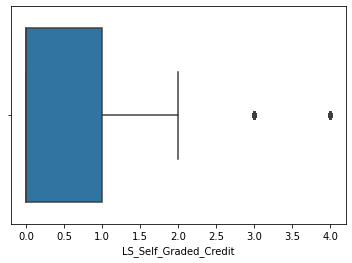

In [301]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(LeadScore_df.LS_Self_Graded_Credit)

<AxesSubplot:xlabel='LS_Self_Graded_Credit', ylabel='Density'>

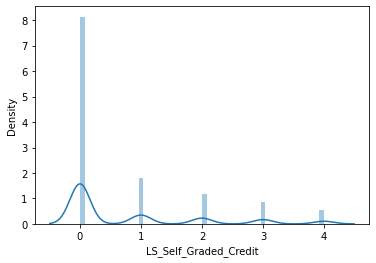

In [302]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(LeadScore_df.LS_Self_Graded_Credit)

In [303]:
LeadScore_df['LS_Self_Graded_Credit'].fillna(LeadScore_df['LS_Self_Graded_Credit'].median(), inplace =True)

<AxesSubplot:xlabel='Mean_monthly_mortgage_and_owner_costs'>

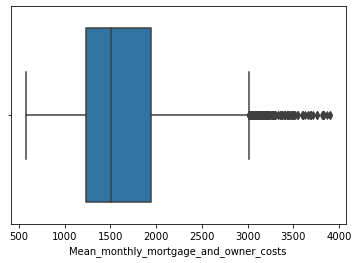

In [304]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(LeadScore_df.Mean_monthly_mortgage_and_owner_costs)

<AxesSubplot:xlabel='Mean_monthly_mortgage_and_owner_costs', ylabel='Density'>

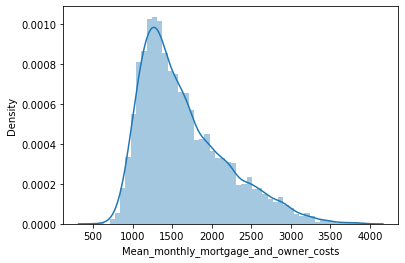

In [305]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(LeadScore_df.Mean_monthly_mortgage_and_owner_costs)

In [306]:
LeadScore_df['Mean_monthly_mortgage_and_owner_costs'].fillna(LeadScore_df['Mean_monthly_mortgage_and_owner_costs'].mean(), inplace =True)

<AxesSubplot:xlabel='LS_GAS'>

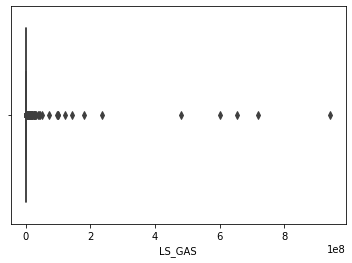

In [307]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(LeadScore_df.LS_GAS)

<AxesSubplot:xlabel='LS_GAS', ylabel='Density'>

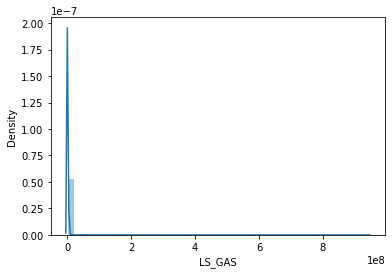

In [308]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(LeadScore_df.LS_GAS)

In [309]:
LeadScore_df['LS_GAS'].fillna(LeadScore_df['LS_GAS'].median(), inplace =True)

<AxesSubplot:xlabel='Number_of_technologies'>

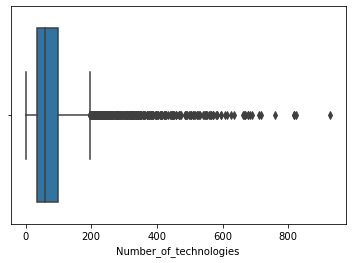

In [310]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(LeadScore_df.Number_of_technologies)

<AxesSubplot:xlabel='Number_of_technologies', ylabel='Density'>

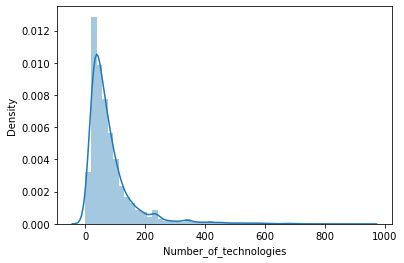

In [311]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(LeadScore_df.Number_of_technologies)

In [312]:
LeadScore_df['Number_of_technologies'].fillna(LeadScore_df['Number_of_technologies'].median(), inplace =True)

<AxesSubplot:xlabel='Number_of_Reviews'>

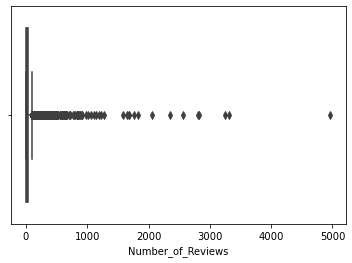

In [313]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(LeadScore_df.Number_of_Reviews)

In [314]:
LeadScore_df['Number_of_Reviews'].fillna(LeadScore_df['Number_of_Reviews'].median(), inplace =True)

<AxesSubplot:xlabel='Average_annual_income_per_household'>

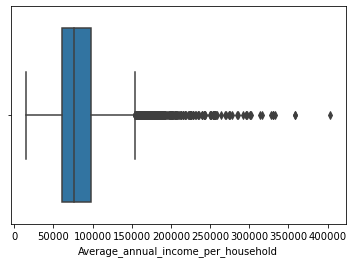

In [315]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(LeadScore_df.Average_annual_income_per_household)

In [316]:
LeadScore_df['Average_annual_income_per_household'].fillna(LeadScore_df['Average_annual_income_per_household'].median(), inplace =True)

<AxesSubplot:xlabel='Rent_mean'>

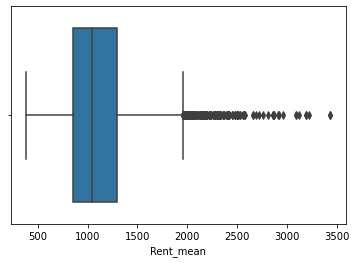

In [317]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(LeadScore_df.Rent_mean)

In [318]:
LeadScore_df['Rent_mean'].fillna(LeadScore_df['Rent_mean'].median(), inplace =True)

<AxesSubplot:xlabel='Number_of_Results'>

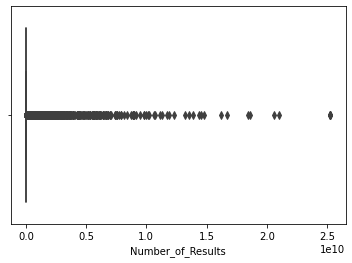

In [319]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(LeadScore_df.Number_of_Results)

In [320]:
LeadScore_df['Number_of_Results'].fillna(LeadScore_df['Number_of_Results'].median(), inplace =True)

<AxesSubplot:xlabel='Average_years_employees_work_at_company'>

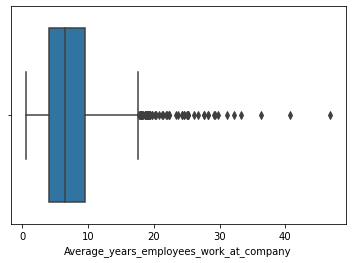

In [321]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(LeadScore_df.Average_years_employees_work_at_company)

In [322]:
LeadScore_df['Average_years_employees_work_at_company'].fillna(LeadScore_df['Average_years_employees_work_at_company'].median(), inplace =True)

<AxesSubplot:xlabel='Number_of_socials'>

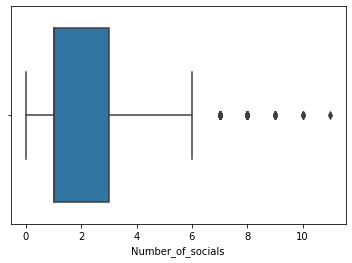

In [323]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(LeadScore_df.Number_of_socials)

In [324]:
LeadScore_df['Number_of_socials'].fillna(LeadScore_df['Number_of_socials'].mean(), inplace =True)

<AxesSubplot:xlabel='Mean_employee_age'>

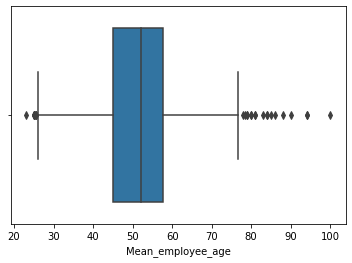

In [325]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(LeadScore_df.Mean_employee_age)

<AxesSubplot:xlabel='Mean_employee_age', ylabel='Density'>

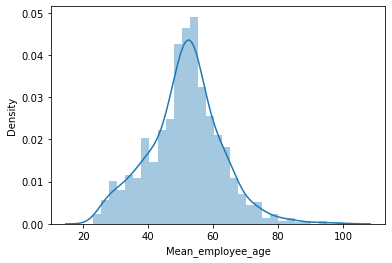

In [326]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(LeadScore_df.Mean_employee_age)

<AxesSubplot:xlabel='Confidence_Score', ylabel='Density'>

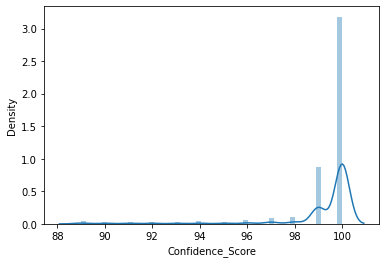

In [327]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(LeadScore_df.Confidence_Score)

In [328]:
LeadScore_df['Confidence_Score'].fillna(LeadScore_df['Confidence_Score'].median(), inplace =True)

In [329]:
LeadScore_df['Mean_employee_age'].fillna(LeadScore_df['Mean_employee_age'].mean(), inplace =True)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

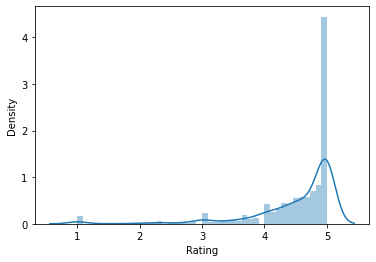

In [330]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(LeadScore_df.Rating)

In [331]:
LeadScore_df['Rating'].fillna(LeadScore_df['Rating'].median(), inplace =True)

<AxesSubplot:xlabel='Results_From_Wikipedia', ylabel='Density'>

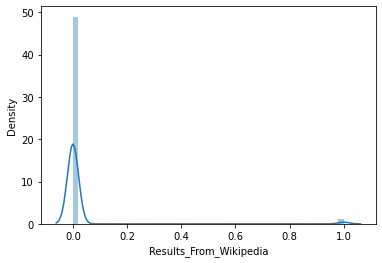

In [332]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(LeadScore_df.Results_From_Wikipedia)

In [333]:
LeadScore_df['Results_From_Wikipedia'].fillna(LeadScore_df['Results_From_Wikipedia'].median(), inplace =True)

<AxesSubplot:xlabel='Company_credit_score', ylabel='Density'>

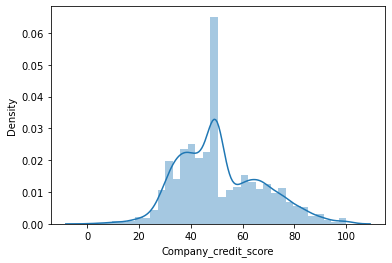

In [334]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(LeadScore_df.Company_credit_score)

In [335]:
LeadScore_df['Company_credit_score'].fillna(LeadScore_df['Company_credit_score'].mean(), inplace =True)

In [336]:
LeadScore_df['address'] = (LeadScore_df["Results_Snippets"].str.lower()
                            .str.contains("address", regex=False, na=False)
                            .astype(int))

In [337]:
LeadScore_df['company'] = (LeadScore_df["Results_Snippets"].str.lower()
                            .str.contains("company", regex=False, na=False)
                            .astype(int))

In [338]:
LeadScore_df.Is_established = LeadScore_df.Is_established.map({False:0,True:1})
LeadScore_df.Unclaimed_Listing = LeadScore_df.Unclaimed_Listing.map({False:0,True:1})
LeadScore_df.Permanently_Closed = LeadScore_df.Permanently_Closed.map({False:0,True:1})
LeadScore_df.Results_From_Wikipedia = LeadScore_df.Results_From_Wikipedia.map({False:0,True:1})
LeadScore_df.Map_Exists = LeadScore_df.Map_Exists.map({False:0,True:1})
LeadScore_df.Has_Customer_Service = LeadScore_df.Has_Customer_Service.map({False:0,True:1})

LeadScore_df

,City,Company,Email,FirstName,Is_Submitted,LastName,LS_Amount_to_Borrow,LS_GAS,LS_Self_Graded_Credit,Phone,...,NAICS_sector_code,Number_of_employees_range,Company_credit_score,Number_of_socials,Region_count,Confidence_Score,LS_State,Difference,address,company
0,McKinney,Namaste Cafe,00mojosdad@gmail.com,Lee,0,Rone,150000,240000,3,4693217785,...,NaN,NaN,51.212596,2.05007,NaN,100.0,40,730.0,0,0
1,Gilbert,Beauty To You,0326studio@gmail.com,Pedro,0,Falcon,15000,150000,2,4803833027,...,NaN,NaN,51.212596,2.05007,NaN,100.0,3,NaN,0,0
2,NaN,Covert Ops Security M&B,06waking_label@icloud.com,Marcus,0,Hardy,37500,60000,0,410 4439828,...,52.0,51-200,51.212596,2.05007,NaN,99.0,47,NaN,0,0
3,NaN,On the go towing,09grandpa@gmail.com,Luallen,0,Weaver,37500,60000,0,229 3495406,...,NaN,NaN,51.212596,2.05007,NaN,100.0,47,NaN,0,1
4,NaN,Perfectly square remodeling,09jespinoza2@gmail.com,Jonathan,0,Espinoza,7500,150000,0,678 9149946,...,54.0,44571,48.000000,2.05007,NaN,100.0,47,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,NaN,ZuMonroe's Custom Creations LLC,zumonroes@gmail.com,Shamica,0,Dickerson,7500,60000,0,336 3358387,...,44.0,44571,51.212596,2.05007,NaN,100.0,47,730.0,0,1
16602,NaN,Mazur LLC,zurawskim74@gmail.com,Mariusz,1,Zurawski,37500,750000,0,480 4760784,...,56.0,44571,51.212596,2.05007,NaN,100.0,47,NaN,1,1
16603,NaN,Zuritech Billing Solutions,zuritechsolutions@gmail.com,Michelle,0,Dodd,7500,60000,0,405 9817133,...,99.0,44571,51.212596,2.05007,NaN,100.0,47,365.0,1,1
16604,NaN,Zane Myers Agency LLC,zwmyers5@gmail.com,Zane,0,Myers,25000,300000,0,660 7488765,...,99.0,44571,51.212596,2.05007,NaN,100.0,47,4748.0,0,0


In [339]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
LeadScore_df['Web_Ad_Outlet_code'] = ord_enc.fit_transform(LeadScore_df[['Web_Ad_Outlet__c']])
LeadScore_df[['Web_Ad_Outlet_code',"Web_Ad_Outlet__c"]].sample(5)

,Web_Ad_Outlet_code,Web_Ad_Outlet__c
3037,26.0,5190
1275,3.0,1101
15484,16.0,1267
4891,3.0,1101
2282,23.0,5061


In [340]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
LeadScore_df['Web_Ad_Outlet_Source_code'] = ord_enc.fit_transform(LeadScore_df[['Web_Ad_Outlet_Source__c']])
LeadScore_df[['Web_Ad_Outlet_Source__c',"Web_Ad_Outlet_Source_code"]].sample(5)

,Web_Ad_Outlet_Source__c,Web_Ad_Outlet_Source_code
15008,Direct,3.0
7065,Digital-Organic,1.0
3535,Lending Tree,4.0
1485,Digital - Affiliate,0.0
14834,Strategic Partners,5.0


In [341]:
#LeadScore_df =LeadScore_df.dropna(subset = ['State'], axis = 0)

In [342]:
#from sklearn.preprocessing import OrdinalEncoder

#ord_enc = OrdinalEncoder()
#LeadScore_df['State_code'] = ord_enc.fit_transform(LeadScore_df[['State']])
#LeadScore_df[['State_code',"State"]].tail(5)

In [343]:
#LeadScore_df =LeadScore_df.dropna(subset = ['Company_vertical'], axis = 0)

In [344]:
#from sklearn.preprocessing import OrdinalEncoder

#ord_enc = OrdinalEncoder()
#LeadScore_df['Company_vertical_code'] = ord_enc.fit_transform(LeadScore_df[['Company_vertical']])
#LeadScore_df[['Company_vertical_code',"Company_vertical"]].sample(5)

In [345]:
#from sklearn.preprocessing import LabelEncoder

#Number_of_employees_dict = {'51-200':125.0,'1001-5000':3000.0,'10001+':10001.0, '201-500':350.0, '5001-10000':7500.0,'501-1000':750.0}

 
#LeadScore_df['Number_of_employees_range'].replace(Number_of_employees_dict, inplace=True)


#LeadScore_df['Number_of_employees_range'].head()

In [346]:
LeadScore_df['Permanently_Closed'].fillna(LeadScore_df['Permanently_Closed'].mean(), inplace =True)
LeadScore_df['Map_Exists'].fillna(LeadScore_df['Map_Exists'].mean(), inplace =True)
LeadScore_df['Has_Customer_Service'].fillna(LeadScore_df['Has_Customer_Service'].mean(), inplace =True)
LeadScore_df['Is_established'].fillna(LeadScore_df['Is_established'].mean(), inplace =True)
LeadScore_df['Unclaimed_Listing'].fillna(LeadScore_df['Unclaimed_Listing'].mean(), inplace =True)
LeadScore_df['Difference'].fillna(LeadScore_df['Difference'].mean(), inplace =True)
LeadScore_df['NAICS_sector_code'].fillna(LeadScore_df['NAICS_sector_code'].mean(), inplace =True)


In [347]:
import re

LeadScore_df['Email'] = LeadScore_df['Email'].str.lower()
LeadScore_df['Email_stripped'] = LeadScore_df['Email'].str.replace('[^\w]', '')
LeadScore_df['Email_domain'] = LeadScore_df['Email'].str.split('@', expand=True)[1]
        # Generating short domain name
#LeadScore_df['Email_domain'] = LeadScore_df['Email'].str.lower()
#LeadScore_df['short_domain'] = LeadScore_df['Email_domain'].str.split('.', expand=True)[1]

In [348]:
LeadScore_df['Email_domain']

0          gmail.com
1          gmail.com
2         icloud.com
3          gmail.com
4          gmail.com
            ...     
16601      gmail.com
16602      gmail.com
16603      gmail.com
16604      gmail.com
16605    hotmail.com
Name: Email_domain, Length: 16606, dtype: object

In [349]:
LeadScore_df =LeadScore_df.dropna(subset = ['Email_domain'], axis = 0)

In [350]:
LeadScore_df['Email_domain'] = LeadScore_df['Email_domain'].apply(lambda x:0 if x == 'gmail.com' else 1 if x=='yahoo.com' else 2)

In [351]:
LeadScore_df = LeadScore_df.drop(['City','Company','Region_count','Email','FirstName','LastName','Phone','NAICS','PostalCode','Street', 'SubmitterIP__c','Home_Street_Address', 'Longitude', 'Latitude',
                                  'Company_Website','Results_From_Wikipedia_1','Results_Snippets','Company_Website_1','Company_type','Domain_expiry_date','Domain_creation_date','$100,000_to_$149,999_-_non-family_households_income',
                                  'Less_than_$20,000_-_family_households', 'Average_title_length','Establishment_year','QoQ_employees_ages_20-30','DUNS','Average_number_of_reviews','Total_number_of_businesses',
                                  'Money_spend_on_website_technologies','Web_Ad_Outlet__c','Web_Ad_Outlet_Source__c','State','Company_vertical','Full_Name','Email_stripped','Website','Number_of_employees_range','Company_vertical'], axis=1)
       
LeadScore_df  

,Is_Submitted,LS_Amount_to_Borrow,LS_GAS,LS_Self_Graded_Credit,Results_From_Wikipedia,Has_Customer_Service,Map_Exists,Unclaimed_Listing,Permanently_Closed,Rating,...,Company_credit_score,Number_of_socials,Confidence_Score,LS_State,Difference,address,company,Web_Ad_Outlet_code,Web_Ad_Outlet_Source_code,Email_domain
0,0,150000,240000,3,0,0.0,0.0,1.0,0.0,4.8,...,51.212596,2.05007,100.0,40,730.000000,0,0,3.0,4.0,0
1,0,15000,150000,2,0,0.0,0.0,1.0,0.0,4.8,...,51.212596,2.05007,100.0,3,3658.584025,0,0,3.0,4.0,0
2,0,37500,60000,0,0,0.0,0.0,1.0,0.0,4.8,...,51.212596,2.05007,99.0,47,3658.584025,0,0,0.0,1.0,2
3,0,37500,60000,0,0,0.0,0.0,1.0,0.0,4.8,...,51.212596,2.05007,100.0,47,3658.584025,0,1,1.0,2.0,0
4,0,7500,150000,0,0,0.0,0.0,1.0,0.0,4.8,...,48.000000,2.05007,100.0,47,3658.584025,0,1,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,0,7500,60000,0,0,0.0,1.0,1.0,0.0,4.8,...,51.212596,2.05007,100.0,47,730.000000,0,1,16.0,5.0,0
16602,1,37500,750000,0,0,0.0,0.0,1.0,0.0,4.8,...,51.212596,2.05007,100.0,47,3658.584025,1,1,20.0,3.0,0
16603,0,7500,60000,0,0,0.0,1.0,1.0,0.0,4.8,...,51.212596,2.05007,100.0,47,365.000000,1,1,16.0,5.0,0
16604,0,25000,300000,0,0,0.0,1.0,1.0,0.0,5.0,...,51.212596,2.05007,100.0,47,4748.000000,0,0,17.0,5.0,0


In [352]:
#LeadScore_df.to_csv('Train6-8leads.csv', index = False)

In [353]:
LeadScore_df.describe()

,Is_Submitted,LS_Amount_to_Borrow,LS_GAS,LS_Self_Graded_Credit,Results_From_Wikipedia,Has_Customer_Service,Map_Exists,Unclaimed_Listing,Permanently_Closed,Rating,...,Company_credit_score,Number_of_socials,Confidence_Score,LS_State,Difference,address,company,Web_Ad_Outlet_code,Web_Ad_Outlet_Source_code,Email_domain
count,16606.000000,1.660600e+04,1.660600e+04,16606.000000,16606.000000,16606.000000,16606.000000,16606.0,16606.000000,16606.000000,...,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000
mean,0.182946,9.562914e+04,6.626102e+05,0.710707,0.020173,0.001502,0.312240,1.0,0.005052,4.740293,...,51.212596,2.050070,99.493677,31.705649,3658.584025,0.297302,0.585993,9.520414,3.174937,0.730880
std,0.386634,8.620737e+05,1.252162e+07,1.151416,0.140597,0.036372,0.435258,0.0,0.066588,0.359052,...,7.805106,0.882599,1.609570,16.577451,2051.794068,0.457084,0.492565,8.851543,1.469735,0.894303
min,0.000000,1.000000e+00,6.000000e+04,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,...,1.000000,0.000000,89.000000,0.000000,365.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.750000e+04,6.000000e+04,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,4.800000,...,51.212596,2.050070,100.000000,14.000000,3287.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,0.000000,3.750000e+04,1.500000e+05,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,4.800000,...,51.212596,2.050070,100.000000,40.000000,3658.584025,0.000000,1.000000,3.000000,4.000000,0.000000
75%,0.000000,7.500000e+04,3.500000e+05,1.000000,0.000000,0.000000,1.000000,1.0,0.000000,4.800000,...,51.212596,2.050070,100.000000,47.000000,3658.584025,1.000000,1.000000,17.000000,4.000000,2.000000
max,1.000000,5.000000e+07,9.428400e+08,4.000000,1.000000,1.000000,1.000000,1.0,1.000000,5.000000,...,100.000000,11.000000,100.000000,47.000000,36563.000000,1.000000,1.000000,27.000000,5.000000,2.000000


In [354]:
Submitted = (sum(LeadScore_df["Is_Submitted"])/len(LeadScore_df['Is_Submitted'].index))*100
Submitted

18.29459231603035

In [355]:
#df['address'] = df['Results_Snippets'].apply(lambda x: 'address' in x.lower())

In [356]:
LeadScore_df.corr()

,Is_Submitted,LS_Amount_to_Borrow,LS_GAS,LS_Self_Graded_Credit,Results_From_Wikipedia,Has_Customer_Service,Map_Exists,Unclaimed_Listing,Permanently_Closed,Rating,...,Company_credit_score,Number_of_socials,Confidence_Score,LS_State,Difference,address,company,Web_Ad_Outlet_code,Web_Ad_Outlet_Source_code,Email_domain
Is_Submitted,1.000000,-0.026978,-0.013557,-0.059405,-0.024691,-0.013198,0.021948,NaN,0.007649,-0.015621,...,0.001002,-0.014585,0.002149,0.027533,-0.034594,0.020718,0.041031,-0.034051,-0.064802,0.031104
LS_Amount_to_Borrow,-0.026978,1.000000,0.245492,-0.014148,0.054114,0.022327,-0.012498,NaN,-0.003049,-0.000485,...,0.015668,0.008888,0.002764,0.044242,0.041366,-0.020895,-0.021620,0.037999,0.078184,0.026368
LS_GAS,-0.013557,0.245492,1.000000,-0.014601,0.041976,0.001844,0.002899,NaN,-0.001974,-0.028070,...,0.020675,0.015296,0.001874,0.028020,0.030787,-0.007756,-0.016150,0.022702,0.039949,0.015024
LS_Self_Graded_Credit,-0.059405,-0.014148,-0.014601,1.000000,-0.040953,-0.020344,0.069901,NaN,0.015250,-0.005074,...,-0.048308,-0.006501,0.075344,-0.380418,-0.006524,0.026003,-0.054355,-0.454716,0.346523,-0.018999
Results_From_Wikipedia,-0.024691,0.054114,0.041976,-0.040953,1.000000,0.182765,-0.069789,NaN,-0.010398,0.018732,...,0.029743,0.095916,-0.017133,0.081226,0.127157,-0.055848,-0.069836,-0.006210,0.008276,-0.009026
Has_Customer_Service,-0.013198,0.022327,0.001844,-0.020344,0.182765,1.000000,-0.026131,NaN,-0.002763,0.006867,...,0.017076,0.106741,0.001797,0.023696,0.100981,-0.023236,-0.025595,0.019410,0.026217,-0.005922
Map_Exists,0.021948,-0.012498,0.002899,0.069901,-0.069789,-0.026131,1.000000,NaN,0.105751,-0.262776,...,0.008397,-0.072595,0.007422,-0.041099,-0.152024,-0.024679,-0.086912,-0.002356,0.070197,0.066865
Unclaimed_Listing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Permanently_Closed,0.007649,-0.003049,-0.001974,0.015250,-0.010398,-0.002763,0.105751,NaN,1.000000,-0.048593,...,0.007675,0.003534,0.014336,-0.011372,-0.001780,0.010013,-0.007632,-0.015193,0.001121,-0.009593
Rating,-0.015621,-0.000485,-0.028070,-0.005074,0.018732,0.006867,-0.262776,NaN,-0.048593,1.000000,...,-0.002760,0.018080,0.016932,-0.015422,-0.018174,-0.024668,0.008926,0.019947,-0.014819,-0.010153


In [357]:
LeadScore_df.isnull().sum()

Is_Submitted                               0
LS_Amount_to_Borrow                        0
LS_GAS                                     0
LS_Self_Graded_Credit                      0
Results_From_Wikipedia                     0
Has_Customer_Service                       0
Map_Exists                                 0
Unclaimed_Listing                          0
Permanently_Closed                         0
Rating                                     0
Number_of_Reviews                          0
Number_of_Results                          0
Mean_monthly_mortgage_and_owner_costs      0
Rent_mean                                  0
Is_established                             0
Number_of_technologies                     0
Average_annual_income_per_household        0
Average_years_employees_work_at_company    0
Mean_employee_age                          0
NAICS_sector_code                          0
Company_credit_score                       0
Number_of_socials                          0
Confidence

In [358]:
X = LeadScore_df.drop('Is_Submitted', axis =1)

y = LeadScore_df[['Is_Submitted']]

In [359]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


In [360]:
#X_train.to_csv('Train4-11LN.csv', index = False)

In [361]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [362]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [363]:
from sklearn.ensemble import RandomForestClassifier


In [364]:
import imblearn

In [365]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
# fit predictor and target 

variablex_ros, y_ros = ros.fit_resample(X, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'Is_Submitted': 1})
Resample dataset shape Counter({'Is_Submitted': 1})


In [366]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({'Is_Submitted': 1})


In [367]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                11624
Model:                            GLM   Df Residuals:                    11595
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5347.0
Date:                Thu, 09 Jun 2022   Deviance:                       10694.
Time:                        10:45:17   Pearson chi2:                 1.15e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6992      0.452     -1.548      0.122      -1.585       0.186
x1          -135.8495     21.273     -6.386      0.000    -177.543     -94.156
x2           -56.6622     37.053     -1.529      0.126    -129.285      15.960
x3            -0.9101      0.143     -6.369      0.000      -1.190      -0.630
x4            -0.3392      0.216     -1.568      0.117      -0.763       0.085
x5            -3.4594      5.486     -0.631      0.528     -14.212       7.293
x6             0.1551      0.060      2.593      0.010       0.038       0.272
x7          4.251e-13   8.28e-13      0.514      0.607    -1.2e-12    2.05e-12
x8             0.2222      0.336      0.661      0.508      -0.436       0.881
x9            -0.3383      0.255     -1.329      0.184      -0.837       0.161
x10           -3.3327      2.015     -1.654      0.098      -7.283       0.617
x11           -1.1320      0.923     -1.227      0.220      -2.940       0.676
x12           -0.0282      0.363     -0.078      0.938      -0.740       0.683
x13            0.5001      0.482      1.038      0.299      -0.444       1.445
x14           -0.1174      0.110     -1.068      0.285      -0.333       0.098
x15            0.6633      0.469      1.415      0.157      -0.256       1.582
x16            0.3126      0.540      0.579      0.562      -0.745       1.370
x17           -1.3430      0.797     -1.686      0.092      -2.904       0.218
x18           -0.5329      0.635     -0.839      0.402      -1.778       0.712
x19            0.2010      0.110      1.824      0.068      -0.015       0.417
x20           -0.2270      0.327     -0.694      0.488      -0.868       0.414
x21           -0.3670      0.362     -1.014      0.311      -1.076       0.342
x22            0.0868      0.169      0.514      0.608      -0.244       0.418
x23            0.0126      0.082      0.153      0.878      -0.149       0.174
x24           -0.3310      0.521     -0.635      0.525      -1.352       0.690
x25            0.0217      0.055      0.393      0.694      -0.086       0.130
x26            0.1849      0.053      3.511      0.000       0.082       0.288
x27           -0.5222      0.103     -5.046      0.000      -0.725      -0.319
x28            0.0947      0.105      0.898      0.369      -0.112       0.301
x29            0.1570      0.055      2.856      0.004       0.049       0.265
==============================================================================
"""

In [368]:
X_train.shape, y_train.shape

((11624, 29), (11624, 1))

In [369]:
X_test.shape, y_test.shape

((4982, 29), (4982, 1))

In [370]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.008312
Feature 1: 0.002672
Feature 2: 0.002935
Feature 3: 0.000891
Feature 4: 0.000000
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.005805
Feature 9: 0.000000
Feature 10: 0.000000
Feature 11: 0.001700
Feature 12: 0.000495
Feature 13: 0.000000
Feature 14: 0.000000
Feature 15: 0.000000
Feature 16: 0.001284
Feature 17: 0.000000
Feature 18: 0.000000
Feature 19: 0.005936
Feature 20: 0.000000
Feature 21: 0.000000
Feature 22: 0.000000
Feature 23: 0.003835
Feature 24: 0.002979
Feature 25: 0.006295
Feature 26: 0.006650
Feature 27: 0.004894
Feature 28: 0.001827


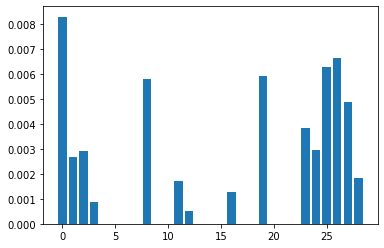

In [371]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [372]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [373]:
from sklearn.feature_selection import RFE

rfe = RFE(model,25)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [374]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])

In [375]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [376]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LS_Amount_to_Borrow', True, 1),
 ('LS_GAS', True, 1),
 ('LS_Self_Graded_Credit', True, 1),
 ('Results_From_Wikipedia', True, 1),
 ('Has_Customer_Service', True, 1),
 ('Map_Exists', True, 1),
 ('Unclaimed_Listing', False, 5),
 ('Permanently_Closed', True, 1),
 ('Rating', True, 1),
 ('Number_of_Reviews', True, 1),
 ('Number_of_Results', True, 1),
 ('Mean_monthly_mortgage_and_owner_costs', False, 3),
 ('Rent_mean', True, 1),
 ('Is_established', True, 1),
 ('Number_of_technologies', True, 1),
 ('Average_annual_income_per_household', False, 2),
 ('Average_years_employees_work_at_company', True, 1),
 ('Mean_employee_age', True, 1),
 ('NAICS_sector_code', True, 1),
 ('Company_credit_score', True, 1),
 ('Number_of_socials', True, 1),
 ('Confidence_Score', True, 1),
 ('LS_State', True, 1),
 ('Difference', True, 1),
 ('address', False, 4),
 ('company', True, 1),
 ('Web_Ad_Outlet_code', True, 1),
 ('Web_Ad_Outlet_Source_code', True, 1),
 ('Email_domain', True, 1)]

In [377]:
col = X_train.columns[rfe.support_]
col

Index(['LS_Amount_to_Borrow', 'LS_GAS', 'LS_Self_Graded_Credit',
       'Results_From_Wikipedia', 'Has_Customer_Service', 'Map_Exists',
       'Permanently_Closed', 'Rating', 'Number_of_Reviews',
       'Number_of_Results', 'Rent_mean', 'Is_established',
       'Number_of_technologies', 'Average_years_employees_work_at_company',
       'Mean_employee_age', 'NAICS_sector_code', 'Company_credit_score',
       'Number_of_socials', 'Confidence_Score', 'LS_State', 'Difference',
       'company', 'Web_Ad_Outlet_code', 'Web_Ad_Outlet_Source_code',
       'Email_domain'],
      dtype='object')

In [378]:
X_train_sm = sm.add_constant(X_train[col].values)

X_train_sm = sm.add_constant(X_train[col].values)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                11624
Model:                            GLM   Df Residuals:                    11598
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5347.3
Date:                Thu, 09 Jun 2022   Deviance:                       10695.
Time:                        10:45:21   Pearson chi2:                 1.15e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6873      0.451     -1.525      0.127      -1.571       0.196
x1          -135.5008     21.257     -6.374      0.000    -177.163     -93.838
x2           -56.2702     36.969     -1.522      0.128    -128.728      16.187
x3            -0.9003      0.142     -6.337      0.000      -1.179      -0.622
x4            -0.3421      0.216     -1.582      0.114      -0.766       0.082
x5            -3.4795      5.545     -0.627      0.530     -14.348       7.389
x6             0.1555      0.060      2.603      0.009       0.038       0.273
x7             0.2266      0.336      0.674      0.500      -0.432       0.885
x8            -0.3377      0.254     -1.328      0.184      -0.836       0.161
x9            -3.3010      2.012     -1.640      0.101      -7.245       0.643
x10           -1.1420      0.923     -1.237      0.216      -2.951       0.667
x11            0.6332      0.289      2.194      0.028       0.067       1.199
x12           -0.1175      0.110     -1.070      0.285      -0.333       0.098
x13            0.6613      0.469      1.411      0.158      -0.257       1.580
x14           -1.3451      0.796     -1.690      0.091      -2.905       0.215
x15           -0.5305      0.635     -0.836      0.403      -1.775       0.714
x16            0.2021      0.110      1.835      0.067      -0.014       0.418
x17           -0.2325      0.327     -0.711      0.477      -0.873       0.408
x18           -0.3664      0.362     -1.013      0.311      -1.075       0.343
x19            0.0878      0.169      0.519      0.604      -0.244       0.419
x20            0.0152      0.081      0.187      0.852      -0.144       0.175
x21           -0.3353      0.521     -0.644      0.520      -1.356       0.686
x22            0.1896      0.051      3.731      0.000       0.090       0.289
x23           -0.5198      0.103     -5.031      0.000      -0.722      -0.317
x24            0.0963      0.105      0.915      0.360      -0.110       0.303
x25            0.1583      0.055      2.882      0.004       0.051       0.266
==============================================================================
"""

In [379]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.17394812, 0.17596627, 0.18197222, 0.21975749, 0.09652601,
       0.13330247, 0.1737546 , 0.11558253, 0.14611097, 0.26047361])

In [380]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([0.17394812, 0.17596627, 0.18197222, 0.21975749, 0.09652601,
       0.13330247, 0.1737546 , 0.11558253, 0.14611097, 0.26047361])

In [381]:
Submitted_prob = y_train_pred
Submitted = y_train.values
y_train_pred_final = pd.DataFrame(Submitted,Submitted_prob)
                                  
                                   
y_train_pred_final['Prospect_ID'] = y_train.index

y_train_pred_final

,0,Prospect_ID
0.173948,1,8379
0.175966,0,15809
0.181972,1,5276
0.219757,0,473
0.096526,0,2314
...,...,...
0.167923,0,9225
0.131595,0,13123
0.259852,0,9845
0.223495,0,10799


In [382]:
y_train_pred_final.reset_index(inplace=True)

In [383]:
y_train_pred_final.rename(columns = {"index":"Submitted_Prob", 0:"Submitted"}, inplace=True)

In [384]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Submitted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.173948,1,8379,0,0,0,0,0,0,0,0,0,0
1,0.175966,0,15809,0,0,0,0,0,0,0,0,0,0
2,0.181972,1,5276,0,0,0,0,0,0,0,0,0,0
3,0.219757,0,473,0,0,0,0,0,0,0,0,0,0
4,0.096526,0,2314,0,0,0,0,0,0,0,0,0,0


In [385]:
y_train_pred_final['predicted'] = y_train_pred_final.Submitted_Prob.apply(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0.173948,1,8379,0,0,0,0,0,0,0,0,0,0,0
1,0.175966,0,15809,0,0,0,0,0,0,0,0,0,0,0
2,0.181972,1,5276,0,0,0,0,0,0,0,0,0,0,0
3,0.219757,0,473,0,0,0,0,0,0,0,0,0,0,0
4,0.096526,0,2314,0,0,0,0,0,0,0,0,0,0,0


In [386]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [387]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Rating,77.04
14,Mean_employee_age,74.89
16,Company_credit_score,41.44
18,Confidence_Score,37.56
13,Average_years_employees_work_at_company,15.00
11,Is_established,14.57
23,Web_Ad_Outlet_Source_code,9.03
17,Number_of_socials,8.32
10,Rent_mean,7.85
15,NAICS_sector_code,6.99


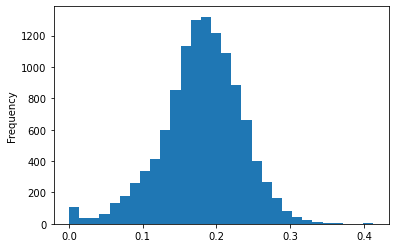

In [388]:
ax = y_train_pred_final['Submitted_Prob'].plot.hist(bins=30)

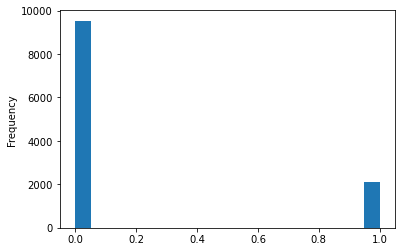

In [389]:
ax = y_train_pred_final['Submitted'].plot.hist(bins=20)

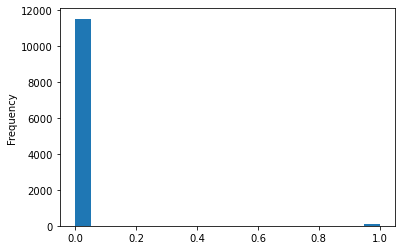

In [390]:
ax = y_train_pred_final['predicted'].plot.hist(bins=20)

In [391]:
#y_train_pred_final.to_csv('Sub_probmm4-11.csv', index = True)

In [392]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.796


In [393]:
#  Logistic regression
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [394]:
accuracy_logreg = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))
print()

Cross Validation Scores for Log Reg: [0.5357406  0.52404643 0.53233831 0.52496775 0.52754745]
Mean Accuracy Score for Log Reg: 0.528928109798995



In [395]:
accuracy_score(y_test,y_pred, normalize=True) * 100

80.97149739060619

In [396]:
print("Training score:", model.score(X_train, y_train))

Training score: 0.8201995870612526


In [397]:
from sklearn.model_selection import cross_validate

scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall',
           'f1':'f1'}

scores = cross_validate(model,  X, y, scoring=scoring, cv=5, 
                        return_train_score=False)

In [398]:
scores

{'fit_time': array([0.2760253 , 0.30603361, 0.27602625, 0.31302834, 0.33703637]),
 'score_time': array([0.01500511, 0.01200151, 0.01600933, 0.01299906, 0.01500177]),
 'test_acc': array([0.5357406 , 0.52404643, 0.53233831, 0.52496775, 0.52754745]),
 'test_prec': array([0.52776188, 0.51821749, 0.52461322, 0.5190583 , 0.52030319]),
 'test_rec': array([0.67943994, 0.68153336, 0.68743089, 0.68238762, 0.70817981]),
 'test_f1': array([0.59407216, 0.58875975, 0.59508615, 0.58962114, 0.59987516])}

In [399]:
KNN_model = KNeighborsClassifier()

In [400]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_KNN = cross_val_score(KNN_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

Cross Validation Scores for Log KNN: [0.70394252 0.7037037  0.70057122 0.69872858 0.70407223]
Mean Accuracy Score for KNN: 0.7022036505428316


In [401]:
param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 1}
Best Cross Vlidation Score: 0.7611293881312615


In [406]:
parameters = {'splitter': ('best','random'),
             'max_depth': [2,4,6],
             'max_features':[2,4,6, None],
             'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'splitter': 'best'}

In [407]:
model = DecisionTreeClassifier(splitter=grid_search.best_params_['splitter'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                      max_features=grid_search.best_params_['max_features'],
                                       criterion= grid_search.best_params_['criterion'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [408]:
y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100

print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 75.28498427672956
Out-of-sample Accuracy: 74.48408018867924


In [409]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix
[[2871  540]
 [1191 2182]]
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      3411
           1       0.80      0.65      0.72      3373

    accuracy                           0.74      6784
   macro avg       0.75      0.74      0.74      6784
weighted avg       0.75      0.74      0.74      6784



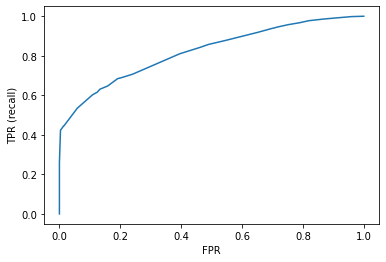

In [410]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

In [411]:
y_pred_prob =model.predict_proba(X_test)[:,1]
fpr,tpr, threshold= roc_curve(y_test,y_pred_prob)

In [412]:
from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) 
print("AUC for logreg: {:.3f}".format(logreg_auc))

AUC for logreg: 0.821


In [466]:
#from sklearn.model_selection import cross_val_score
#cv_scores = cross_val_score(model,X,y, cv=5, scoring='roc_auc')
#print(cv_scores)

In [413]:
feature_names = X = LeadScore_df.drop('Is_Submitted', axis =1)

In [414]:
#print(feature_names)
model.feature_importances_

array([6.75652743e-03, 2.02024198e-02, 4.66508131e-02, 0.00000000e+00,
       0.00000000e+00, 1.10183023e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.81931995e-04, 1.19100009e-02, 0.00000000e+00,
       1.66460251e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.23790565e-04, 0.00000000e+00, 2.84140812e-04, 4.66487890e-04,
       0.00000000e+00, 0.00000000e+00, 1.33787880e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.29141173e-01, 5.38247208e-01,
       0.00000000e+00])

In [415]:
from sklearn import tree
import graphviz
fig = plt.figure(figsize=(20,15))

class_names = ['0', '1']
feature_names = X.columns

dot_data = tree.export_graphviz(model, 
                  feature_names=feature_names, 
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None)
                           
graph = graphviz.Source(dot_data)


<Figure size 1440x1080 with 0 Axes>

In [108]:
#graph.render("decision_treeLeadN_graphviz")
#'decision_treeLeadN_graphviz.png'

In [417]:
## Calculating feature_importance = 
model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_names, model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature_Importance'], ascending=False).head()

,Feature_Importance
Web_Ad_Outlet_Source_code,0.538247
LS_State,0.133788
Web_Ad_Outlet_code,0.129141
Map_Exists,0.110183
LS_Self_Graded_Credit,0.046651


In [155]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100
print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 92.76729559748428
Out-of-sample Accuracy: 80.10291595197255


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [148]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [149]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5817929358673957


In [ ]:
#len(CreditRisk_merge['contract_number'].unique())